# El método del codo y el factor de la silueta del clustering

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [29]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1), 2)

<function matplotlib.pyplot.show(close=None, block=None)>

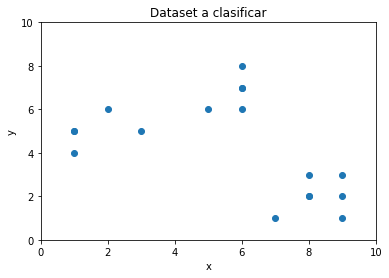

In [30]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


* Para k =  2 el promedio de la silueta es de: 0.6113424368705715
   - Para i =  1 la silueta del cluster vale:  0.7746251901389686
   - Para i =  2 la silueta del cluster vale:  0.49704450958269375
* Para k =  3 el promedio de la silueta es de: 0.7122079383287169
   - Para i =  1 la silueta del cluster vale:  0.7322200728725188
   - Para i =  2 la silueta del cluster vale:  0.7345257364682265
   - Para i =  3 la silueta del cluster vale:  0.6609508863896014
* Para k =  4 el promedio de la silueta es de: 0.6389948643127632
   - Para i =  1 la silueta del cluster vale:  0.7345257364682265
   - Para i =  2 la silueta del cluster vale:  0.24096929517637128
   - Para i =  3 la silueta del cluster vale:  0.654458796162702
   - Para i =  4 la silueta del cluster vale:  0.655666655624379
* Para k =  5 el promedio de la silueta es de: 0.450456025779209
   - Para i =  1 la silueta del cluster vale:  -0.09040786759303471
   - Para i =  2 la silueta del cluster vale:  0.24096929517637128
   - Par

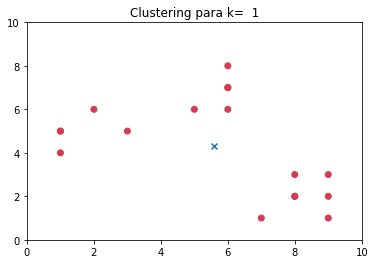

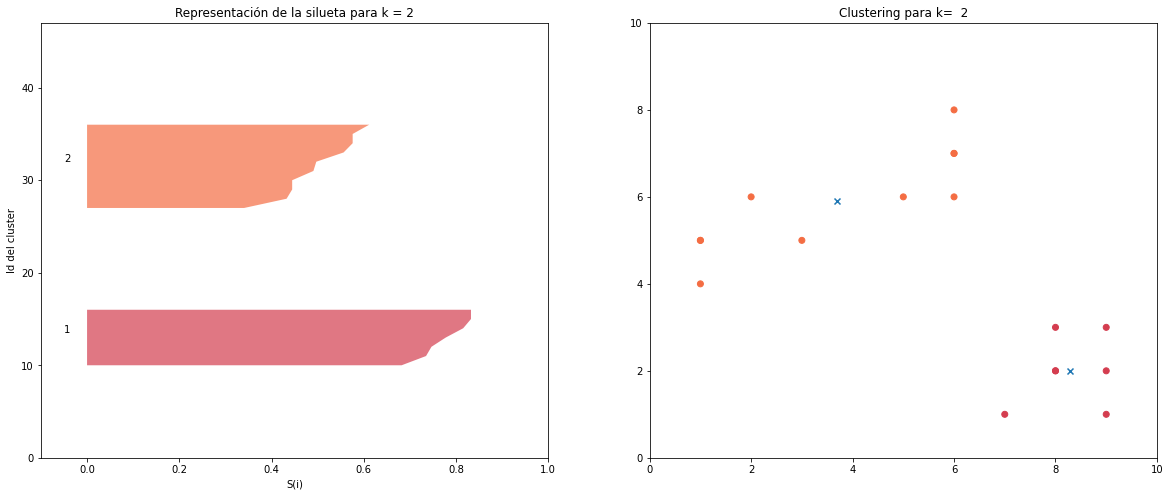

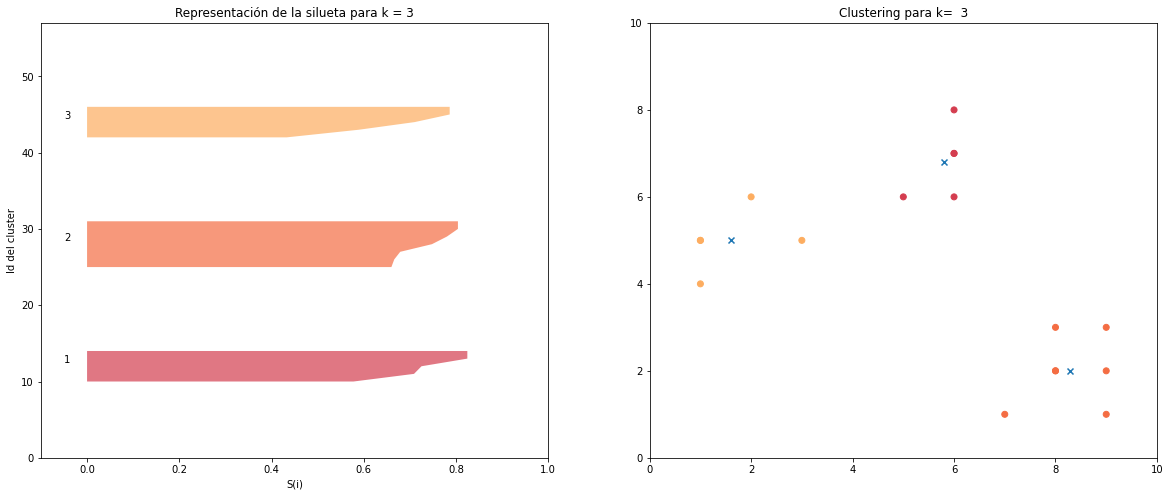

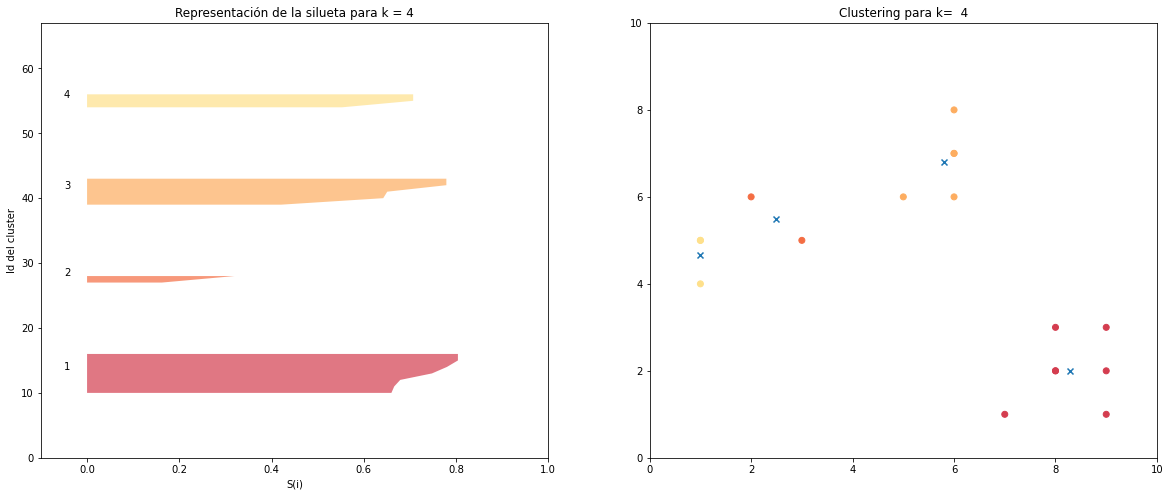

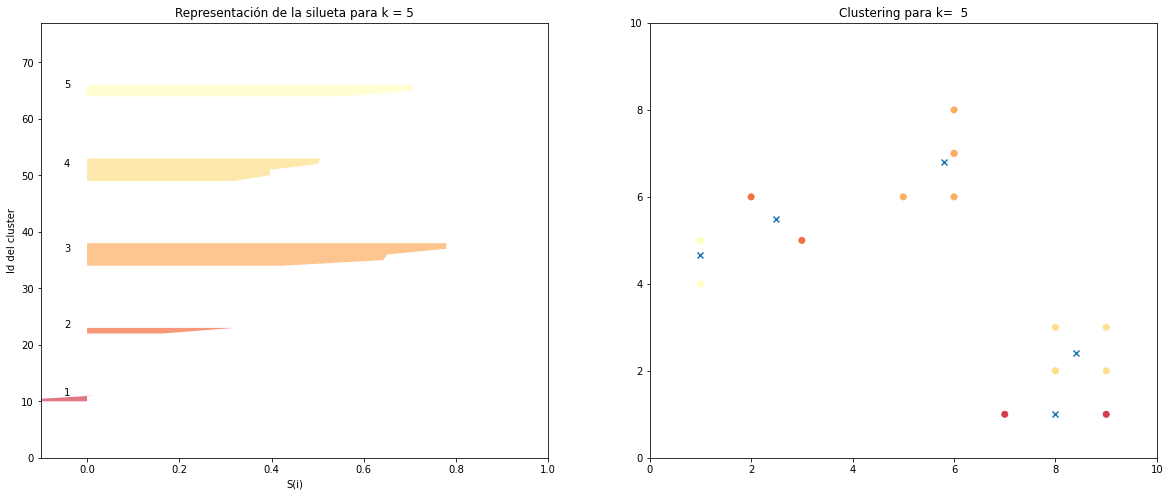

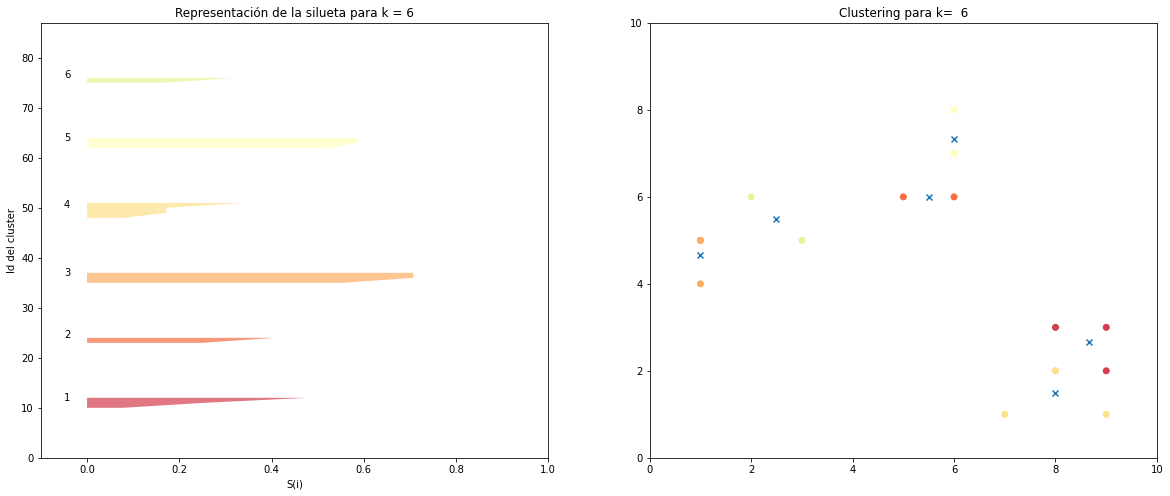

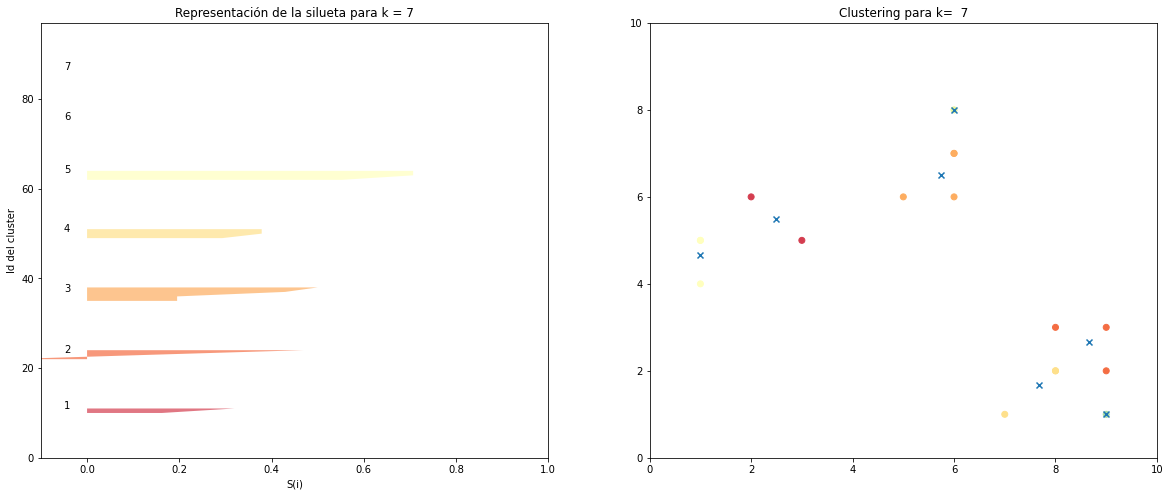

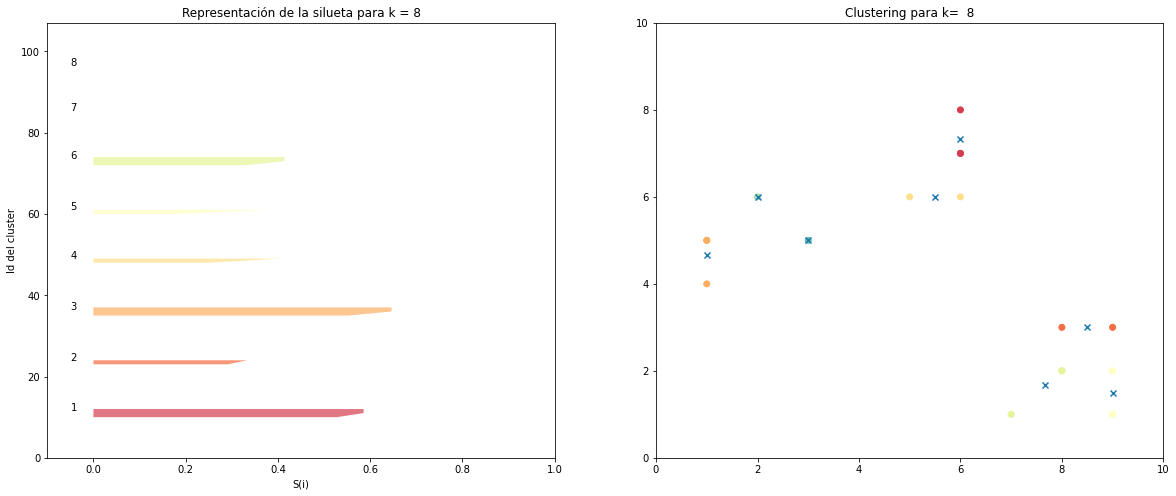

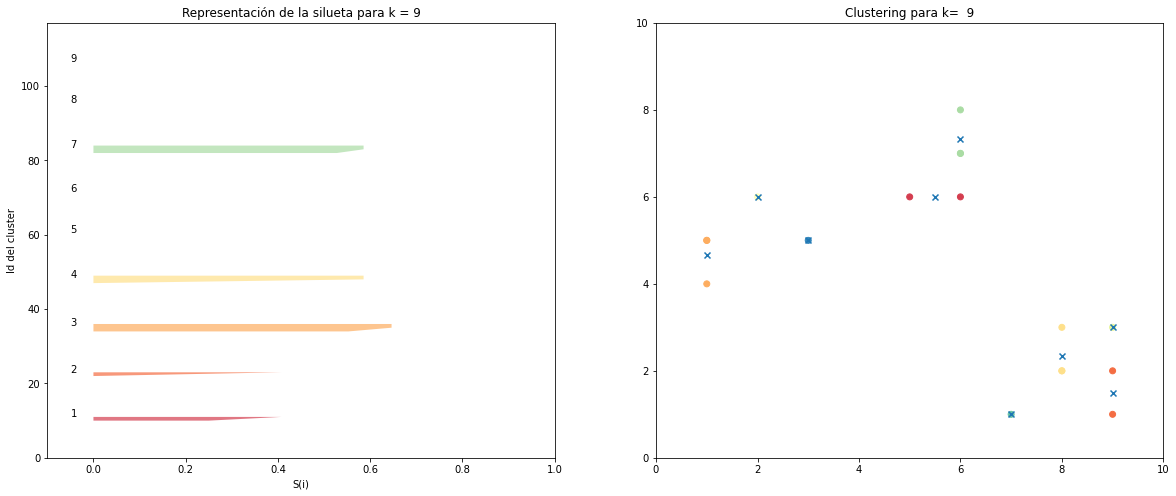

In [31]:
max_k = 10 
K = range(1,max_k)
ssw = []
cmap = cm.get_cmap("Spectral")
color_palette = [cmap(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
        
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"),axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    
    if 1<k<len(X):
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        axis1.set_xlim([-0.1,1.0])
        axis1.set_ylim([0, len(X)+ (k+1)*10])
        
        silhouette_avg = silhouette_score(X,labels)
        print("* Para k = ",k, "el promedio de la silueta es de:" ,silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range (k):
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = " ,i+1, "la silueta del cluster vale: " , np.mean(ith_cluster_sv))
            ith_cluster_sv.sort()
            
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            axis1.text(-0.05, y_lower +0.5 * ith_cluster_size, str(i+1))
            
            y_lower = y_upper +10
            
        axis1.set_title("Representación de la silueta para k = %s" %str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Id del cluster")
        
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k=  %s"%str(k))
    plt.scatter(x1,x2, c= label_color)
    plt.scatter(centers[0], centers[1], marker= "x")
    plt.show
    
    
    
    
    
